In [1]:
import numpy as np
import torch
from helper_functions.helper_functions import NoiseAddition,DataNormalization, Interpolate, RandomHorizontalFlipBscan
from matplotlib import pyplot as plt

In [2]:
data=np.load(r'E:\Simulated_and_experimental_data\Synthetic_data\B-scans\data\param_fbh_gaussian_size10mm_depth10pct_thickness3mm_row_0180.npy',allow_pickle=True)
mask=np.load(r'E:\Simulated_and_experimental_data\Synthetic_data\B-scans\detection\param_fbh_gaussian_size10mm_depth10pct_thickness3mm_row_0180.npy',allow_pickle=True)
depth=np.load(r'E:\Simulated_and_experimental_data\Synthetic_data\B-scans\depth\param_fbh_gaussian_size10mm_depth10pct_thickness3mm_row_0180.npy',allow_pickle=True)

In [3]:
data=torch.from_numpy(data).unsqueeze(0).unsqueeze(0).float()
mask=torch.from_numpy(mask).unsqueeze(0).unsqueeze(0).float()
depth=torch.from_numpy(depth).unsqueeze(0).unsqueeze(0).float()

In [4]:
config=np.load(r'C:\Users\stone\Temporal_thermal_image\normalization_params.npz',allow_pickle=True)
deltaT_max=config['T_max']
deltaT_min=config['T_min']
data_normalization=DataNormalization(deltaT_max,deltaT_min)
data=data_normalization.normalize(data)

In [5]:
resize=Interpolate(size=512)
data=resize(data)

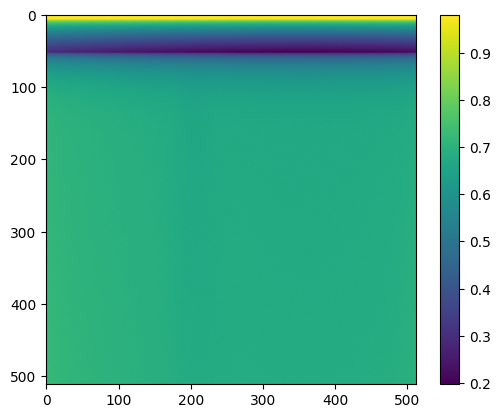

In [6]:
plt.imshow(data[0,0,:,:])
plt.colorbar()

In [7]:
flipper=RandomHorizontalFlipBscan(p=0.5)

In [10]:
data_flip,mask_flip,depth_flip=flipper(data,mask,depth)

Text(0.5, 1.0, 'Depth Mask')

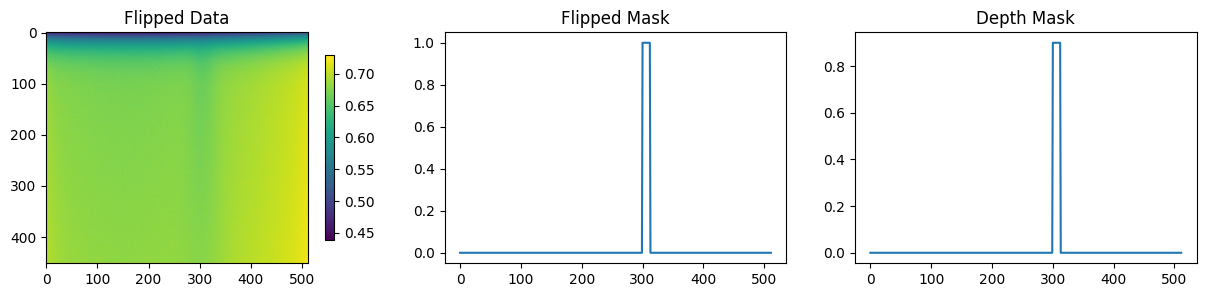

In [11]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.imshow(data_flip[0,0,60:,:])
plt.title('Flipped Data')
plt.colorbar(shrink=0.8)
plt.subplot(1,3,2)
plt.plot(mask_flip[0,0,:])
plt.title('Flipped Mask')
plt.subplot(1,3,3)
plt.plot(depth_flip[0,0,:])
plt.title('Depth Mask')

In [12]:
X=torch.randn((1,1,512,512))
conv=torch.nn.Conv2d(1,1,kernel_size=(15,1),padding=(7,0),stride=(2,1))
out=conv(X)

In [13]:
out.size()

torch.Size([1, 1, 256, 512])